In [1]:
pip install yfinance --user

In [2]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
import yfinance as yf

In [3]:
# Fetch historical stock price data using yfinance
google = yf.Ticker("GOOG")
df = google.history(period='1d', interval="1m")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-05-25 09:30:00-04:00,125.209999,125.980003,125.180000,125.699997,2210805,0.0,0.0
2023-05-25 09:31:00-04:00,125.699997,125.779999,124.877502,125.019997,370352,0.0,0.0
2023-05-25 09:32:00-04:00,125.019997,125.434196,124.889999,124.919998,271595,0.0,0.0
2023-05-25 09:33:00-04:00,124.949997,125.290001,124.870003,125.099998,203465,0.0,0.0
2023-05-25 09:34:00-04:00,125.080002,125.110001,124.769997,125.110001,163335,0.0,0.0


In [4]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2023-05-25 09:30:00-04:00,125.180000
2023-05-25 09:31:00-04:00,124.877502
2023-05-25 09:32:00-04:00,124.889999
2023-05-25 09:33:00-04:00,124.870003
2023-05-25 09:34:00-04:00,124.769997


In [5]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,125.180000
09:31:00,124.877502
09:32:00,124.889999
09:33:00,124.870003
09:34:00,124.769997


In [6]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test = X[-offset:]
y_test = y[-offset:]

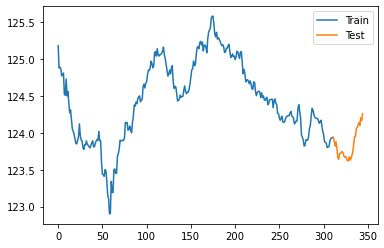

In [7]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [8]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
import yfinance as yf

# Fetch historical stock price data using yfinance
google = yf.Ticker("GOOG")
df = google.history(period='1d', interval="1m")

# Preprocess the data
# Assuming you want to predict whether the stock price will go up or down,
# you need to create a target variable with binary labels
df['Target'] = df['Close'].diff().shift(-1) > 0

# Select the features (X) and target variable (y)
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Target'].astype(int).values

# Create a logistic regression model
model = LogisticRegression()

# Fit the model
with warnings.catch_warnings():
    warnings.filterwarnings("error", category=ConvergenceWarning)
    try:
        model.fit(X, y)
    except ConvergenceWarning:
        print("ConvergenceWarning: Maximum number of iterations exceeded")

# Evaluate the model
score = model.score(X, y)
print("Model score:", score)


Model score: 0.5246376811594203


In [9]:
# Get the real data for time 0 and time 1
y_train = y[:-1]
y_test = y[-1]

# Predict the data for time 1
X_test = X[-1].reshape(1, -1)
forecast = model.predict(X_test)

print(f'Real data for time 0: {y_train[-1]}')
print(f'Real data for time 1: {y_test}')
print(f'Pred data for time 1: {forecast}')

Real data for time 0: 1
Real data for time 1: 0
Pred data for time 1: [1]
